### **Crea un espacio dentro del repositorio de GitHub que creaste para el portafolio de implementación (por ejemplo, una carpeta para el módulo de ML con una subcarpeta para este entregable).**

### **Selecciona uno de los dos primeros 'Challenge' vistos en clase (Week01_Challenge.pdf o Week02_Challenge1.pdf) y programa un algoritmo que permita resolver el problema. Dicho algoritmo debe ser uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice), y no puedes usar ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada. Lo que se busca es que implementes manualmente el algoritmo, no que importes un algoritmo ya implementado.**

In [ ]:

#Importaremos las librerias para poder leer el documento
import pandas as pd
import numpy as np

#Haremos uso del primer Challenge, el cual contiene una base de datos llamada Valhalla23.csv, como primer
#paso, importaremos este dataset y le asignaremos una variable

dataset = pd.read_csv('Valhalla23.csv')


#Ahora dividiremos el dataset en dos partes, usando 70% de los datos para nuestra variable train y 30% para la variable test
v70 = int(0.7 * len(dataset))
v = dataset[:v70]
v_test = dataset[v70:]

#Ahora asignaremos una variable para cada columna, de esta manera sera mas facil
X = v['Celsius']
y = v['Valks']



### **Divide el set de datos del problema en dos subconjuntos, uno para entrenamiento y otro para prueba. Entrena tu modelo sobre el primer subconjunto, y por un mínimo de 100 iteraciones. Selecciona valores para la tasa de aprendizaje y para los parámetros iniciales, según tu criterio.**

In [ ]:
#Dividir los datos en conjuntos, uno de test y uno de train para facilitar su uso
mitad = len(X) // 2
x_train = X[:mitad]
x_test = X[mitad:]
y_train = y[:mitad]
y_test = y[mitad:]

#Asignamos valores para ambos tethas y alpha

#Para tetha asignaremos valores de 1 para tener valores regulares como punto de partida
tetha0 = 1
tetha1 = 1

#Asignaremos un alpha de 0.0001 para tener un aprendizaje lento pero mas seguro, teniendo como prioridad
#la calidad de los datos
alpha = 0.0001

#Asignamos una variable que indique el numero de iteraciones
num_iteraciones = 150000

#Declaramos la funcion de hipotesis
htetha = lambda tetha0, tetha1, x: tetha0 + (tetha1 * x)

#Calcular el total de muestras en el conjunto de prueba (n)
n = len(x_train)

#Creamos dos variables para poder ir almacenando las iteraciones
theta0_values = []
theta1_values = []
#Iterar el proceso de ajuste de theta0 y theta1
for i in range(num_iteraciones):
    #Calcular la hipótesis
    h0 = htetha(tetha0, tetha1, x_train)

    #Calcular los errores para theta0
    delta0 = np.subtract(h0, y_train)
    delta0t = np.sum(delta0)

    #Actualizar theta0
    tetha0 = tetha0 - alpha * (delta0t/n)

    #Calcular los errores para theta1
    deltax = np.multiply(delta0, x_train)
    deltaxt = np.sum(deltax)

    #Actualizar theta1
    tetha1 = tetha1 - alpha * (deltaxt/n)
    theta0_values.append(tetha0)
    theta1_values.append(tetha1)

print(tetha0)
print(tetha1)


50.31919204538233
-2.9853878603624766


### **Prueba tu implementación. Para ello, utiliza el modelo entrenado para hacer predecir las salidas del subconjunto de prueba, y compara contra los datos reales en una gráfica.**

Valor final de theta0:
50.31919204538233
Valor final de theta1: 
-2.9853878603624766


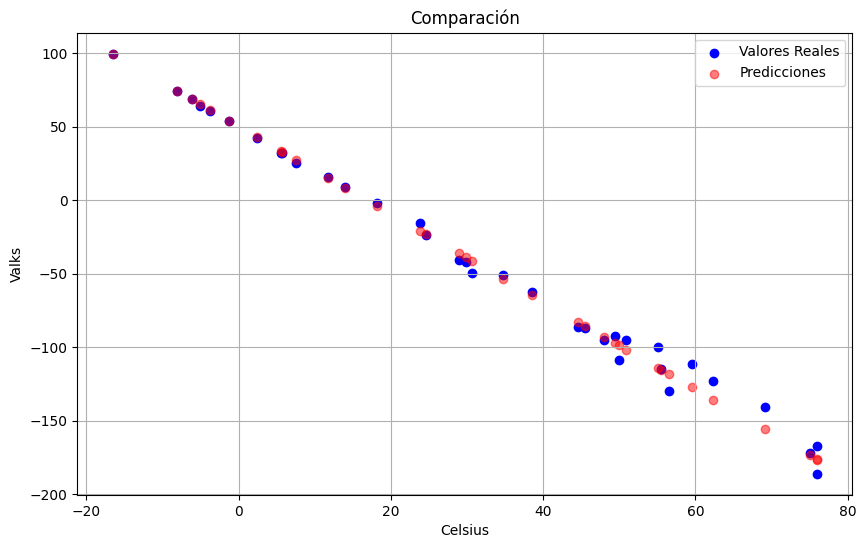

In [ ]:
#Importamos la libreria de matplotlib para poder hacer la grafica
import matplotlib.pyplot as plt

#Utilizamos el modelo entrenado para hacer predicciones
y_pred = htetha(tetha0, tetha1, x_test)

#Imprimir los valores finales de theta0 y theta1
print("Valor final de theta0:")
print(tetha0)
print("Valor final de theta1: ")
print(tetha1)

plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Valores Reales', marker='o')
plt.scatter(x_test, y_pred, color='red', label='Predicciones', marker='o', alpha=0.5)
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Comparación')
plt.legend()
plt.grid(True)

### **Calcula el valor de la función de costo para el subconjunto de entrenamiento, y para el subconjunto de prueba.**

In [ ]:
#Valores de test y train
y_pred_train = htetha(tetha0, tetha1, x_train)
y_pred_test = htetha(tetha0, tetha1, x_test)

#Calcular la funcion de costo para train
mse_train = np.mean((y_train - y_pred_train) ** 2)

#Calcular la función de costo para  test
mse_test = np.mean((y_test - y_pred_test) ** 2)

print("Costo de entrenamiento:")
print(mse_train)

print("\nCosto de prueba:")
print(mse_test)

Costo de entrenamiento:
40.057650053697856

Costo de prueba:
43.23056712805323


### **Para facilitar la revisión, entrega dos archivos. El primero debe ser un Jupyter Notebook con todo el desarrollo (código comentado). El segundo debe ser un PDF del Jupyter Notebook. Para esto último, utiliza el comando nbconvert --to html para exportar el notebook a HTML y poder guardar el PDF más fácilmente (https://github.com/jupyter/nbconvert). Ten en cuenta que debes cargar tu directorio de Drive y dar la ruta al archivo, por lo que el comando completo sería:**
!jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/archivo.ipynb

In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/ColabNotebooks/Varhalla1.ipynb'

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/ColabNotebooks/Varhalla1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jupyt